In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.mnist.load_data()

In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
trainy.shape

(60000,)

In [5]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

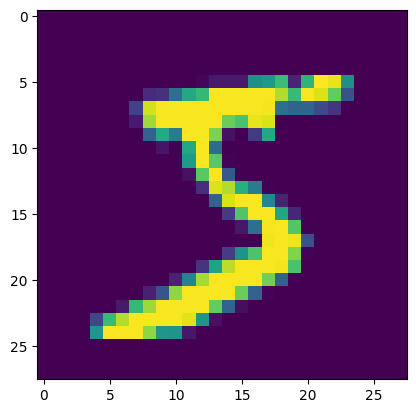

In [6]:
plt.imshow(trainX[0])

In [7]:
train_images = trainX/255
test_images = testX/255

In [8]:
dataset_images = tf.data.Dataset.from_tensor_slices(train_images)

In [9]:
dataset_images

<TensorSliceDataset shapes: (28, 28), types: tf.float64>

In [10]:
dataset_labels = tf.data.Dataset.from_tensor_slices(trainy)

In [11]:
dataset_labels

<TensorSliceDataset shapes: (), types: tf.uint8>

In [12]:
dataset = tf.data.Dataset.zip((dataset_images, dataset_labels))

In [13]:
dataset

<ZipDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [14]:
batch_size = 256
dataset = dataset.shuffle(train_images.shape[0]).repeat().batch(batch_size)

# L1, L2 test

In [15]:
model_dense_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model_dense_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
steps_per_epoch = train_images.shape[0]/batch_size

In [18]:
history_dense_0 = model_dense_0.fit(dataset, 
                                    epochs=20, 
                                    steps_per_epoch=steps_per_epoch, 
                                   validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 3s 13ms/step - loss: 0.2924 - accuracy: 0.9142 - val_loss: 18.1702 - val_accuracy: 0.9633
Epoch 2/20
235/234 [==============================] - 3s 13ms/step - loss: 0.0941 - accuracy: 0.9716 - val_loss: 14.2650 - val_accuracy: 0.9735
Epoch 3/20
235/234 [==============================] - 3s 14ms/step - loss: 0.0587 - accuracy: 0.9820 - val_loss: 11.6956 - val_accuracy: 0.9774
Epoch 4/20
235/234 [==============================] - 3s 14ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 15.4242 - val_accuracy: 0.9776
Epoch 5/20
235/234 [==============================] - 3s 14ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 16.1145 - val_accuracy: 0.9785
Epoch 6/20
235/234 [==============================] - 3s 14ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 14.8053 - val_accuracy: 0.9796
Epoch 7/20
235/234 [==============================] - 3s 15ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 17.6445 - val_accuracy:

In [19]:
print(history_dense_0.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
model_dense_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model_dense_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [25]:
history_dense_1 = model_dense_1.fit(dataset, epochs=20, 
                                    steps_per_epoch=steps_per_epoch, 
                                    validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 6s 25ms/step - loss: 54.1849 - accuracy: 0.1201 - val_loss: 4.1709 - val_accuracy: 0.1135
Epoch 2/20
235/234 [==============================] - 5s 23ms/step - loss: 4.1519 - accuracy: 0.1123 - val_loss: 4.1482 - val_accuracy: 0.1135
Epoch 3/20
235/234 [==============================] - 6s 24ms/step - loss: 4.1512 - accuracy: 0.1125 - val_loss: 4.1341 - val_accuracy: 0.1135
Epoch 4/20
235/234 [==============================] - 6s 26ms/step - loss: 4.1512 - accuracy: 0.1122 - val_loss: 4.1483 - val_accuracy: 0.1135
Epoch 5/20
235/234 [==============================] - 6s 26ms/step - loss: 4.1510 - accuracy: 0.1124 - val_loss: 4.1479 - val_accuracy: 0.1135
Epoch 6/20
235/234 [==============================] - 6s 27ms/step - loss: 4.1509 - accuracy: 0.1124 - val_loss: 4.1651 - val_accuracy: 0.1135
Epoch 7/20
235/234 [==============================] - 6s 26ms/step - loss: 4.1511 - accuracy: 0.1127 - val_loss: 4.1550 - val_accuracy: 0.113

In [26]:
print(history_dense_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [29]:
model_dense_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [30]:
model_dense_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [31]:
history_dense_2 = model_dense_2.fit(dataset, epochs=20, 
                                    steps_per_epoch=steps_per_epoch, 
                                    validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 7s 31ms/step - loss: 4.0879 - accuracy: 0.8355 - val_loss: 32.9765 - val_accuracy: 0.9080
Epoch 2/20
235/234 [==============================] - 7s 30ms/step - loss: 1.2146 - accuracy: 0.9168 - val_loss: 29.3475 - val_accuracy: 0.9114
Epoch 3/20
235/234 [==============================] - 7s 28ms/step - loss: 0.9813 - accuracy: 0.9251 - val_loss: 20.9265 - val_accuracy: 0.9347
Epoch 4/20
235/234 [==============================] - 7s 29ms/step - loss: 0.8549 - accuracy: 0.9350 - val_loss: 31.4913 - val_accuracy: 0.9088
Epoch 5/20
235/234 [==============================] - 7s 30ms/step - loss: 0.7911 - accuracy: 0.9387 - val_loss: 18.3007 - val_accuracy: 0.9428
Epoch 6/20
235/234 [==============================] - 7s 30ms/step - loss: 0.7462 - accuracy: 0.9405 - val_loss: 18.9563 - val_accuracy: 0.9421
Epoch 7/20
235/234 [==============================] - 7s 30ms/step - loss: 0.7110 - accuracy: 0.9443 - val_loss: 17.7001 - val_accuracy:

In [32]:
print(history_dense_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


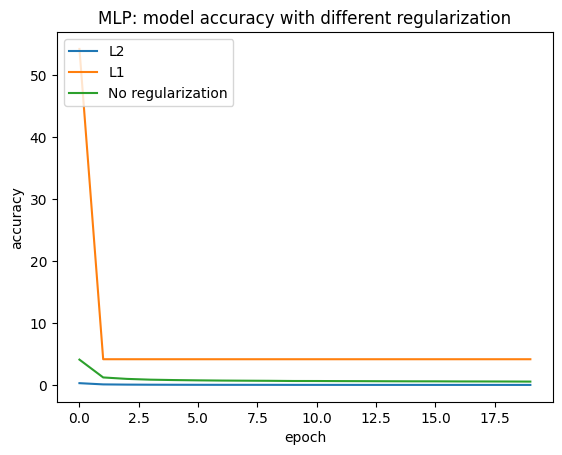

In [36]:
import matplotlib.pyplot as plt
plt.plot(history_dense_0.history['loss'])
plt.plot(history_dense_1.history['loss'])
plt.plot(history_dense_2.history['loss'])
plt.title('MLP: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'L1', 'No regularization'], loc='upper left')
plt.show()

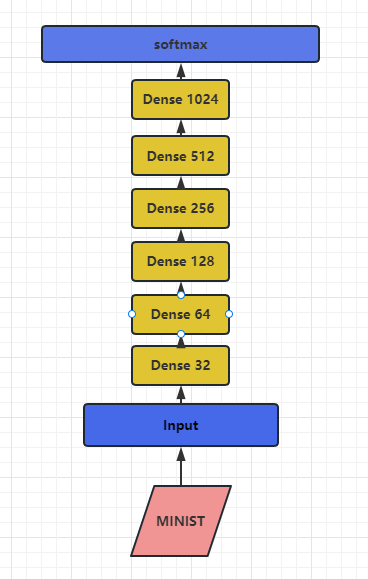

# Dropout test

In [37]:
model_dense_2_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1,noise_shape=None,seed=None),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [38]:
model_dense_2_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [41]:
history_dense_2_drop = model_dense_2_drop.fit(dataset, epochs=20,
                                              steps_per_epoch=steps_per_epoch,
                                              validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 9s 39ms/step - loss: 0.5591 - accuracy: 0.9527 - val_loss: 6.1966 - val_accuracy: 0.9316
Epoch 2/20
235/234 [==============================] - 9s 39ms/step - loss: 0.5521 - accuracy: 0.9533 - val_loss: 8.2924 - val_accuracy: 0.8961
Epoch 3/20
235/234 [==============================] - 9s 39ms/step - loss: 0.5494 - accuracy: 0.9525 - val_loss: 6.3756 - val_accuracy: 0.8989
Epoch 4/20
235/234 [==============================] - 9s 39ms/step - loss: 0.5388 - accuracy: 0.9541 - val_loss: 7.7922 - val_accuracy: 0.8746
Epoch 5/20
235/234 [==============================] - 9s 39ms/step - loss: 0.5396 - accuracy: 0.9519 - val_loss: 7.9160 - val_accuracy: 0.8573
Epoch 6/20
235/234 [==============================] - 9s 39ms/step - loss: 0.5318 - accuracy: 0.9537 - val_loss: 7.8396 - val_accuracy: 0.8183
Epoch 7/20
235/234 [==============================] - 9s 38ms/step - loss: 0.5271 - accuracy: 0.9540 - val_loss: 6.3886 - val_accuracy: 0.8367

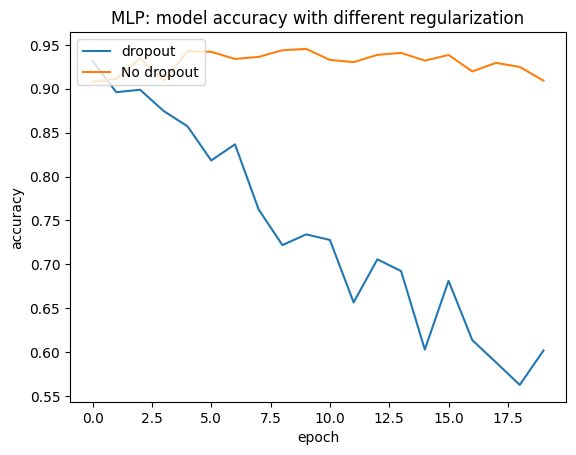

In [42]:
import matplotlib.pyplot as plt
plt.plot(history_dense_2_drop.history['val_accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.title('MLP: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dropout', 'No dropout'], loc='upper left')
plt.show()